# Remember to comment code

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#importing train_test_split
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/SL-recent-grads.csv')
data.head()

,Unnamed: 0,Median,Median_category,Major_code,Major_category,Percent_low_wage,Percent_college,Percent_non_college,Num_majors,ShareWomen,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,110000,110-120K,2419,Engineering,0.082514,0.655836,0.155622,29.0,0.120564,...,0,1,0,0,0,0,0,0,0,0
1,1,75000,70-80K,2416,Engineering,0.066138,0.462963,0.339947,29.0,0.101852,...,0,1,0,0,0,0,0,0,0,0
2,2,73000,70-80K,2415,Engineering,0.000000,0.532710,0.205607,29.0,0.153037,...,0,1,0,0,0,0,0,0,0,0
3,3,70000,70-80K,2417,Engineering,0.000000,0.420509,0.081081,29.0,0.107313,...,0,1,0,0,0,0,0,0,0,0
4,4,65000,60-70K,2405,Engineering,0.030130,0.567700,0.137632,29.0,0.341631,...,0,1,0,0,0,0,0,0,0,0


In [3]:
train, test = train_test_split(data,test_size=0.15)

In [4]:
features = [
            'Major_code',
 'Percent_low_wage',
 'Percent_college',
 'Percent_non_college',
 'Num_majors',
 'ShareWomen',
 'Women',
 'Part_time',
 'Unemployment_rate',
 'P25th',
 'P75th',
 'Percent_sample_size',
 'Major_category_Agriculture & Natural Resources',
 'Major_category_Arts',
 'Major_category_Biology & Life Science',
 'Major_category_Business',
 'Major_category_Communications & Journalism',
 'Major_category_Computers & Mathematics',
 'Major_category_Education',
 'Major_category_Engineering',
 'Major_category_Health',
 'Major_category_Humanities & Liberal Arts',
 'Major_category_Industrial Arts & Consumer Services',
 'Major_category_Interdisciplinary',
 'Major_category_Law & Public Policy',
 'Major_category_Physical Sciences',
 'Major_category_Psychology & Social Work',
 'Major_category_Social Science']

In [5]:
X_train = train[features]
y_train = train['Median_category']

X_test = test[features]
y_test = test['Median_category']

In [25]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test,y_test)
    

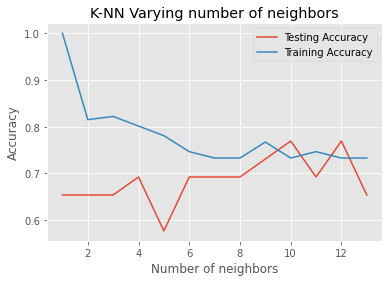

In [26]:
#Generate plot
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

In [30]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)

In [31]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [32]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7307692307692307

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [33]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,30-40K,40-50K,50-60K,60-70K,All
True,,,,,
20-30K,3,0,0,0,3
30-40K,10,2,0,0,12
40-50K,1,7,1,0,9
60-70K,0,0,1,0,1
70-80K,0,0,0,1,1
All,14,9,2,1,26


**Classification Report**

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [35]:
#import classification_report
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      20-30K       0.00      0.00      0.00         3
      30-40K       0.71      0.83      0.77        12
      40-50K       0.78      0.78      0.78         9
      50-60K       0.00      0.00      0.00         0
      60-70K       0.00      0.00      0.00         1
      70-80K       0.00      0.00      0.00         1

    accuracy                           0.65        26
   macro avg       0.25      0.27      0.26        26
weighted avg       0.60      0.65      0.62        26



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Cross Validation**

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

**Hyperparameter tuning**

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning. 

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.


In [14]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [15]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [18]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
knn_cv.best_score_

0.7062068965517241

In [20]:
knn_cv.best_params_

{'n_neighbors': 9}

**ROC (Reciever Operating Charecteristic) curve**

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [37]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [38]:
from sklearn.metrics import roc_curve

In [39]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

ValueError: multiclass format is not supported

NameError: name 'fpr' is not defined

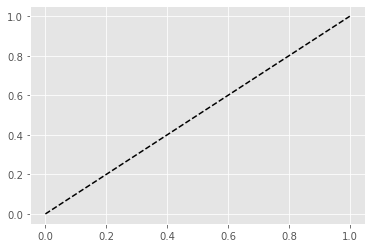

In [40]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('False positive rate - [1-specifity]')
plt.ylabel('True positive rate - [sensitivity] ')
plt.title('Knn(k=7) ROC curve')
plt.show()

In [41]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

ValueError: multi_class must be in ('ovo', 'ovr')